

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment : Linear Regression & Image Classification (CIFAR-10) using Support Vector Machines

## Learning Objectives

At the end of the experiment, you will be able to:

* understand how to approach a Machine Learning problem
* understand how to decide which algorithm to use
* understand why we use Linear Regression 
* implement Linear Regresion using Normal Equation as well as scikit learn
* understand CIFAR-10 dataset
* understand the SVM Linear Classifier
* perform Binary-Classification using SVM Linear Classifier on CIFAR-10 dataset
* extract features using HOG (Histogram of Oriented Gradients) Method
* perform Binary-Classification using SVM Linear Classifier on HOG features

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M2_AST_09_Linear_Regression_&_Image_Classification_(CIFAR_10)_SVM_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/insurance.csv")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/DS_CIFAR-10_STD.zip")
    ipython.magic("sx unzip DS_CIFAR-10_STD.zip")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required Packages


In [4]:
import pandas as pd
import numpy as np        # basic library to work with arrays
import seaborn as sns     # library for statistical data visualization
import matplotlib.pyplot as plt           # basic library for plotting graphs and visualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
               
import pickle
from sklearn.svm import SVC           # importing Support vector classifier

# importing confusion matrix, accuracy score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Problem Statement: Medical Insurance Expense Prediction

### Introduction
What is the importance of medical insurance cost prediction?

If we built such a system that can help to give an estimate of insurance cost based on some conditions of the patient such as age, gender, bmi, etc, it would help insurance companies as well as individuals to know how much they have to spend on their health insurance.

Here, the dataset provided to you contains attributes of a patient such as age, sex, bmi, number of children, region, smoking habit along with the corresponding medical insurance charges incured to them. 

You are expected to use this dataset and build a prediction model to help estimate the cost incured to the future patient given all the relevant details.

Following are the details of each feature/attribute of the given dataset.

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges:** Individual medical costs billed by health insurance

### Loading the Insurance dataset

In [5]:
insurance_data = pd.read_csv('insurance.csv')
print('\nNumber of insurance beneficiaries: {} ; features per beneficiary: {}  '.format(insurance_data.shape[0],insurance_data.shape[1]))
print('')


Number of insurance beneficiaries: 1338 ; features per beneficiary: 7  



In [6]:
# Print the first five rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Summary of the dataset

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



1. Each attribute has a full of `1338 non-null entries`, hence the dataset has no missing values. In case, if any null values(missing values) exist, we generally replace them with mean, median, or mode.

2. The dataset has `4 real` and `3 categorical` attributes/features.

In [8]:
real_cols = insurance_data.select_dtypes(exclude=['object'])
cat_cols = insurance_data.select_dtypes(include=['object'])
print("The numeric columns are: \n{} \n\nThe non-numeric columns are: \n{}"
      .format(list(real_cols.columns),list(cat_cols.columns)))

The numeric columns are: 
['age', 'bmi', 'children', 'charges'] 

The non-numeric columns are: 
['sex', 'smoker', 'region']


When we look at the shape of dataset it returned $(1338,7)$. So there are  $m=1338$  training data and  $n=7$  features. Here, the target variable is charges and remaining six variables are age, sex, bmi, children, smoker, region are independent variable as shown earlier. There are multiple independent variable, so we need to fit Multiple linear regression. For this, the hypothesis function looks like

$h_{θ}(x_{i})=θ_{0}+θ_{1}age+θ_{2}sex+θ_{3}bmi+θ_{4}children+θ_{5}smoker+θ_{6}region$
 
This multiple linear regression equation for given dataset.

If $i=1$ then

$h_{θ}(x_{1})=θ_{0}+θ_{1}19+θ_{2}female+θ_{3}27.900+θ_{4}0+θ_{5}yes+θ_{6}southwest$

$y_{1}=16884.92400$

If $i=3$ then

$h_{θ}(x_{3})=θ_{0}+θ_{1}28+θ_{2}male+θ_{3}33.000+θ_{4}3+θ_{5}no+θ_{6}northwest$

$y_{3}=4449.46200$

$x_{1}=(x_{11}\hspace{0.1cm}x_{12}\hspace{0.1cm}x_{13}\hspace{0.1cm}x_{14}\hspace{0.1cm}x_{15}\hspace{0.1cm}x_{16})=(19 \hspace{0.5cm} female \hspace{0.5cm} 27.9001 \hspace{0.5cm} no \hspace{0.5cm} northwest)$

### Matrix Formulation

In general we can write above vector as

$x_{ij}=(x_{i1}x_{i2}...x_{in})$
 
Now, we combine all available individual vector into single input matrix of size  $(m,n)$  and denoted by  $X$  input matrix, which consist of all training examples,

$X = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n)}$

 $\hat X = \begin{bmatrix}
   1 & x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
   1 & x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
   1 & x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$

We represent parameter of function and dependent variable in vector form as

$\theta = \begin{bmatrix}
    \theta_{0}\\
    \theta_{1}\\
    \vdots    \\
    \theta_{j}  \\
    \vdots     \\
     \theta_{n}  \\
\end{bmatrix}_{(n+1,1)}$  $Y = \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots    \\
    y_{i}  \\
    \vdots     \\
    y_{m}  \\
\end{bmatrix}_{(m,1)}$  

 
Here, we represent hypothesis function in vectorized form

$h_{θ}(X)=X_{θ} =  X \theta$
 


### Visualization for Charges vs BMI

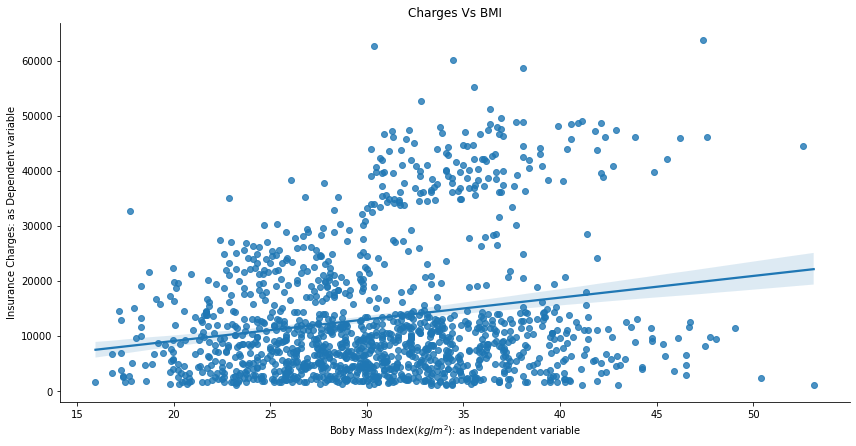

In [12]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi', y='charges', data=insurance_data, aspect=2, height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charges Vs BMI');

In above plot we fit regression line into the variables



### Cost Function

A cost function measures how much error is there in the model by checking in terms of ability to estimate the relationship between  x  and  y . We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}({x}_{i})−y_{i})^2$
  
To implement the linear regression, you should take training example add an extra column that is  $x_{0}$  feature, where  $x_{0}$=1 .  

$x_{0} =(x_{i_{0}}x_{i_{1}}x_{i_{2}}...x_{m_{i}})$ ,

where  $x_{i_{0}}=0$  and input matrix will become as

$X = \begin{bmatrix}
    x_{10}       & x_{11} & x_{12} & \dots & x_{1n} \\
    x_{20}       & x_{21} & x_{22} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m0}       & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$ 

Each of the m input samples is similar to a column vector with n+1 rows,  $x_{0}$  being 1 for our convenience, that is  $x_{10},x_{20},x_{30}...x_{m0}=1$ . Now, we rewrite the ordinary least square cost function in matrix form as:

$J(θ)=\frac{1}{m}(X_{θ}−Y)^T(X_{θ}−Y)$
 
Let's look at the matrix multiplication concept. The multiplication of two matrix happens only if number of column of first matrix is equal to number of rows of second matrix. Here, input matrix  X  of size  $(m,n+1)$ , parameter of function is of size  $(n+1,1)$  and dependent variable vector of size  $(m,1)$ . The product of matrix  $X(m,n+1)θ(n+1,1)$  will return a vector of size  (m,1) , then product of $(X_{θ}−Y)^T_{(1,m)}(X_{θ}−Y)_{(m,1)}$  will return size of unit vector.



### Normal Equation

The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of  $J(θ)$  with respect to  $θ$  and equate to  $0$. The derivative of function is nothing but checking that for a small change in input what would be the change in output of function.

$min_{θ_{0},θ_{1}...θ_{n}}J(θ_{0},θ_{1}..θ_{n})$
 
$\frac{∂J(θ_{j})}{∂ θ_{j}}=0$
 
where  j=0,1,2,....n 

Now we will apply partial derivative to our cost function,

$\frac{∂J(θ_{j})}{∂ θ_{j}}=\frac{\partial}{\partial \theta} (X_{\theta}-Y)^T(X_{\theta}-Y)$


 
We will remove 1/m  since we are going to equate the derivative to 0 and solve $J(θ)$. 

$J(θ)=(X_{θ}−Y)^T(X_{θ}−Y)$
 
=$(X_{θ}^T−Y^T)(X_{θ}−Y)$
 

=$(Xθ)^T−Y^T)(Xθ−Y)$
 
=$(Xθ)^T Xθ−Y^TXθ−(Xθ)^TY+Y^TY$
 
=$θ^T X^TXθ−2(Xθ)^T Y+Y^TY$

Here $\theta$ is unknown. To find where the above function has a minimum, we will derive by $\theta$ and equate it to 0. Also, we only use matrix notation to conveniently represent a system of linear formula. So, we derive by each component of the vector, and then combine the resulting derivatives into a vector again. 
 
$\frac{∂J(θ)}{∂θ}=\frac{∂}{∂θ}(θ^T X^TXθ−2θ^T X^TY+Y^TY)$
 
$0= 2 X^TXθ−2  X^Ty$
 
$ X^TXθ = X^TY$
 
$θ=(X^TX)^{(−1)} X^TY$
 
This is the normal equation for linear regression.

### Exploratory Data Analysis

Let us look into the description of the dataset.

In [14]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
insurance_data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


1. Compare means and standard devaiations for all the real columns to establish that the distributions are different. 

2. What is the problem if different continuous variables have different scales and magnitude?
  
  If there are different ranges for different continuous variables, then, the dataset will have some exceptional values very high or very low among the common values present in the dataset.   

3. What is the possible solution for handling different ranges and why?

  Normalizing the data is the solution. By Normalizing the data, the values can be stuffed in a specific range. Moreover, you will understand about Normalization in the later section. 

#### Check for missing values


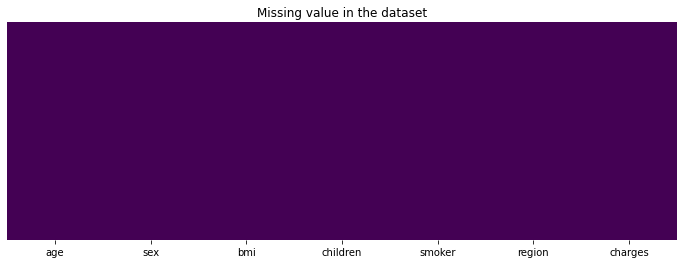

In [19]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance_data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing values in the dataset



#### Visualization of Correlation Matrix

From the below matrix, we observe that the highly correlated features has the correlation value close to 1. 

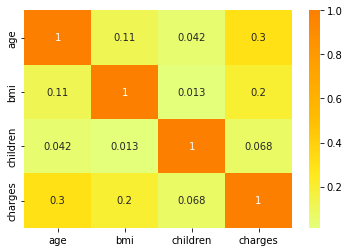

In [20]:
# correlation plot
corr = insurance_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

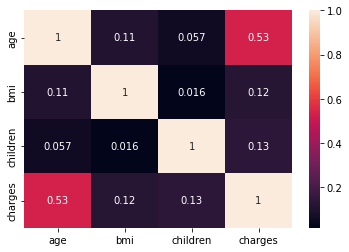

In [28]:
corrz = insurance_data.corr(method = 'spearman')

sns.heatmap(corrz, annot = True)

plt.show()

#### Visualization of Distribution of Insurance Charges

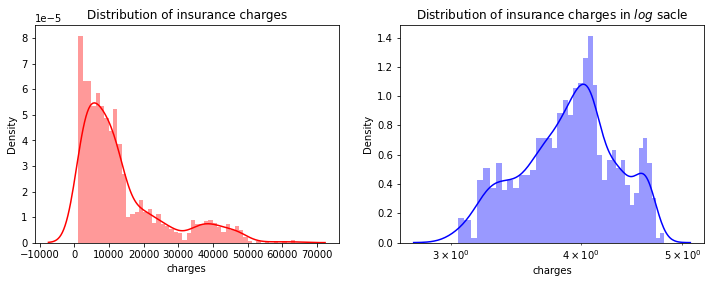

In [22]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(insurance_data['charges'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(insurance_data['charges']), bins=40, color='b', ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. For further analysis we will apply log on target variable charges.

#### Visualization for Charges vs Sex and Charges vs Smoker

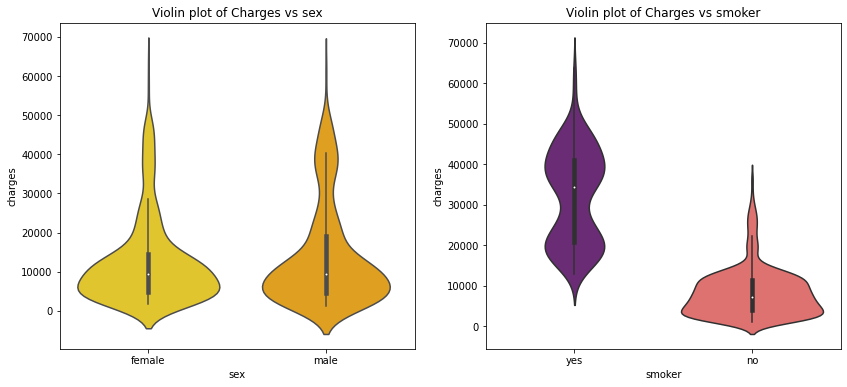

In [23]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=insurance_data, palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=insurance_data, palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range, it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

#### Visualization for Charges vs Children

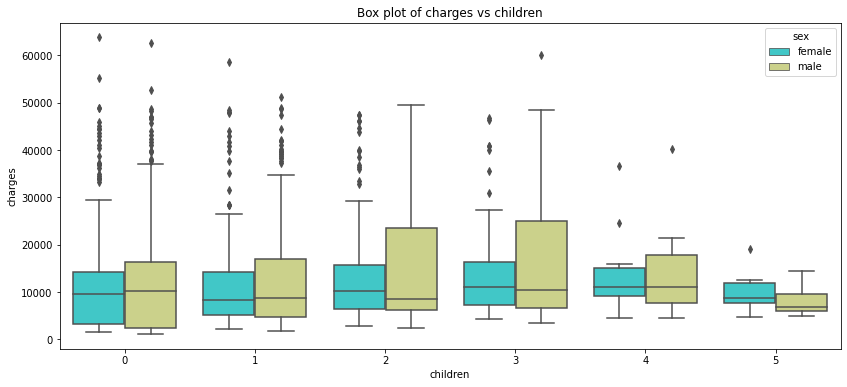

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=insurance_data, palette='rainbow')
plt.title('Box plot of charges vs children');

In [25]:
insurance_data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


#### Visualization for Charges vs Region

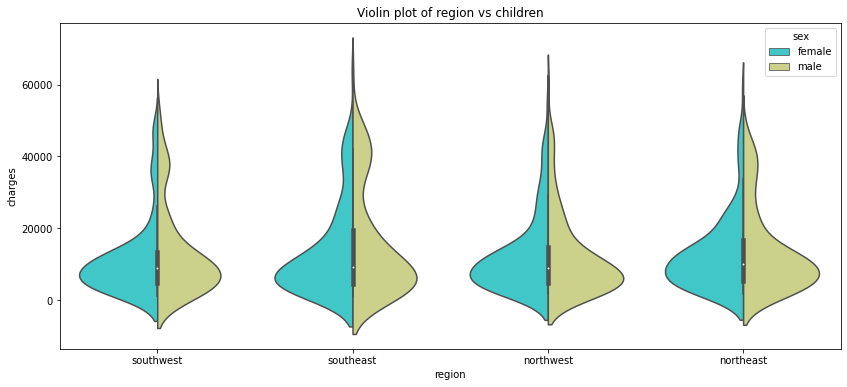

In [26]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex', data=insurance_data, palette='rainbow',split=True)
plt.title('Violin plot of region vs children');

#### Visualization for Charges vs Age and Charges vs BMI

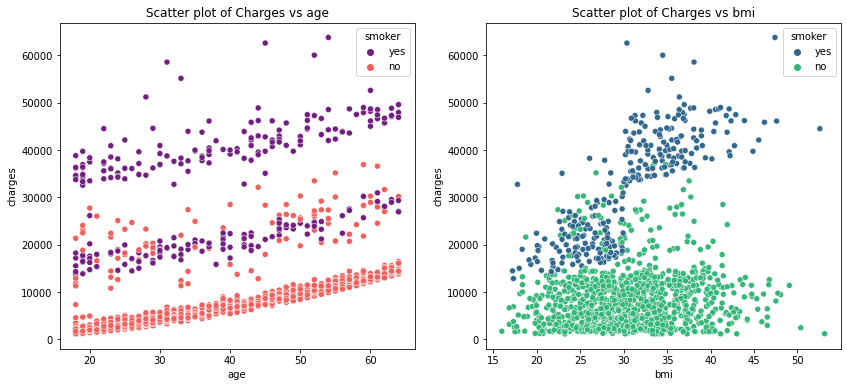

In [27]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age of a person who is insured is 18 year. 

Body mass index (BMI) is a measure of body fat based on height and weight of a person. Here, the minimum bmi is 16 $kg/m^2$  and maximum upto 54 $kg/m^2$

### Data Preprocessing

#### Encoding the categorical data

Machine learning algorithms cannot work with categorical data directly. So,categorical data must be converted to number. We do the conversion in three ways:

1. Label Encoding

2. One hot encoding

3. Dummy variable trap

`Label encoding` refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A `One hot encoding` is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expressive. This first requires that the categorical values should be mapped to integer values, that is label encoding is performed. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated. In simple terms, one variable can be predicted from the others.

Multicollinearity is a statistical calculation in which the independent or explanatory variables are interrelated to each other. Due to this multicollinearity, the model algorithm can not calculate the true relationship between dependent and explanatory variables as the outcome of the prediction has errors

By using pandas `get_dummies` function we can do all above three step in line of code. We will use this fuction to get dummy variable for sex, children,smoker, and region. By setting drop_first =True, function will remove dummy variable trap by droping original variable. To know more about pandas get_dummies, click [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). 


In [29]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
insurance_data_encode = pd.get_dummies(data = insurance_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [30]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',insurance_data.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_data.shape)
print('\nColumns in data frame after encoding dummy variable:\n',insurance_data_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_data_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### Normalizing the data
Earlier we have observed that the ranges of different continuous variables are different. This is actually problematic. Therefore, we perform normalization for continuous variable.
  
The goal of normalization is to change the values of numeric columns in the dataset to a common scale without distorting differences in the ranges of values. We normalize the data to bring all the variables to the same range.
For this we can use `MinMaxScaler`. It scales and translates each feature individually such that it is in the given range on the training set, e.g. between `[0,1]` or else in the range `[-1, 1]` if there are negative values in the dataset. To learn more about MinMaxScaler click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#:~:text=Transform%20features%20by%20scaling%20each,e.g.%20between%20zero%20and%20one.).



In [31]:
# Normalization
scaler = MinMaxScaler()

insurance_data_encode[["charges"]] = scaler.fit_transform(insurance_data_encode[["charges"]])

insurance_data_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0.251611,0,0,0,0,0,0,1,0,0,1
1,18,33.770,0.009636,1,1,0,0,0,0,0,0,1,0
2,28,33.000,0.053115,1,0,0,1,0,0,0,0,1,0
3,33,22.705,0.333010,1,0,0,0,0,0,0,1,0,0
4,32,28.880,0.043816,1,0,0,0,0,0,0,1,0,0


In [33]:
# Checking the inverse transform to cross verify the values
scaler.inverse_transform(insurance_data_encode[['charges']])

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

### Splitting the dataset into train and test sets

In [34]:
X = insurance_data_encode.drop('charges',axis=1) # Independent feature
y = insurance_data_encode['charges'] # Dependent features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [35]:
# Print first five rows from the data
X_test.head()

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
918,61,28.200,0,0,0,0,0,0,0,0,0,1
755,31,27.645,1,0,1,0,0,0,0,0,0,0
207,35,27.740,1,0,1,0,0,0,1,0,0,0
520,50,27.360,0,0,0,0,0,0,0,0,0,0
695,26,40.185,0,0,0,0,0,0,0,1,0,0


### Model building

#### Implementing Linear Regression using Normal Equation

In this step, we will build model using our linear regression equation  $ θ=(X^TX)^{−1}X^Ty$ . In first step we need to add a feature $x_{0}=1$  to our original data set.

In [39]:
# Step 1: add x0 = 1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: Building the model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [40]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [41]:
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,-0.205285
1,theta_1,age,0.003931
2,theta_2,bmi,0.005555
3,theta_3,OHE_male,-0.002042
4,theta_4,OHE_1,0.005137
5,theta_5,OHE_2,0.023564
6,theta_6,OHE_3,0.019124
7,theta_7,OHE_4,0.060136
8,theta_8,OHE_5,0.031356
9,theta_9,OHE_yes,0.387118


#### Implementing Linear Regression using Scikit learn

1. Create an object of Linear Regression function
  
  *lr = LinearRegression()*

2. Fit the training data(features, dependent variable) using the `fit` method from sklearn.linear_model

  *fit(X_train, y_train)*

3. `Predict` the results using the test data that serves as unknown features to the linear regression model.

  *y_pred = lr.predict(X_test)*

4. Find the `Root Mean Square Error` i.e. the difference between the predicted value and the test set value.

  *rmse(y_test,y_pred)*

5. Finally, find the `R2 Score` for y_test and y_pred that depicts the accuracy score of the model built.

  *r2_score(y_test,y_pred)*

If you want to learn more about sklearn Linear Regression, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [38]:
# Scikit Learn module
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is not required here as sklearn will take care of it.

# Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df.head()

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.205285,-0.205285
1,theta_1,age,0.003931,0.003931
2,theta_2,bmi,0.005555,0.005555
3,theta_3,OHE_male,-0.002042,-0.002042
4,theta_4,OHE_1,0.005137,0.005137


The parameter obtained from both the model are same. So, we succefully built our model using normal equation and verified using sklearn linear regression module. Let's move ahead with the next step of prediction and model evaluation.

### Model evaluation using Normal Equation


We will predict value for target variable by using our model parameter for test dataset. Then, compare the predicted value with actual value in test set. We compute Mean Square Error using formula
$J(θ)=\frac{1}{m} \sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$
 
$R^2$  is statistical measure of how close data are to the fitted regression line.  $R^2$  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$R^2$ = 1−$\frac{SSE}{SST}$
 
SSE = Sum of Square Error

SST = Sum of Square Total

$SSE = \sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$SST = \sum_{i=1}^{m} (y_{i}−\bar{y}_{i})^2$

 
Here  $\hat{y}$  is predicted value and  $\bar{y}$  is mean value of  y

In [42]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

# Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.008956304682331852
R square obtain for normal equation method is : 0.7305284299807451


### Model Evaluation using sklearn module

If you want to know more about $R^2$ score, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

If you want to know more about Mean Square Error, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)




In [43]:
# sklearn regression module

y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.008956304682331852
R square obtain for scikit learn library is : 0.7305284299807451


Hence, we have successfully built and evaluated our Linear Regression model with the equation as well as the sklearn library. In both cases, we get the Mean Square Error as 0.00895630468233185 and the R square as 0.7305284299807451.

The low value for MSE denotes that our model has least error values. The R square value denotes the accuracy of the model. As the accuracy of the model increases, the R square value reaches close to 1.

### Problem Statement: Image Classification (CIFAR-10) using Support Vector Machines

## Dataset

#### Description

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 colour images(32x32) in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.


The dataset is divided into five training batches and one test batch where each batch has 10000 images. The test batch contains 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:


<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/CIFAR10.png" alt="Drawing" height="350" width="440"/>

**The code returns the contents of each data file as a dictionary**.

There are 8 pickled files in the CIFAR-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

Getting into details of this dataset:


**data**: A 50,000x3072 numpy array of unsigned integers. Each row of the array stores a 32x32 colour image. The first 1024 intensity values contain the red channel values, the next 1024 intensity values contain the green channel, and the final 1024 the blue channel. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image. 


**labels**: A list of 10,000 numbers from 0-9 (for the above mentioned classes airplane, automobile etc..). The number at index i indicates the label of the ith image in the array data.



The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

**label_names:**  A 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.



### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

#### Function to unpickle the data

To know more details about the pickle refer to the following [link](https://colab.research.google.com/drive/18lWc_k1AiSsSwbiduRTPqENCjDCfCIQZ)


In [44]:
# Function to unpickle the data files which is in the dictionary format
def unpickle(file):
    with open(file, 'rb') as fo:
        # Setting the encoding to latin1 allows to import the data directly
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

When we pass a pickled file to the get_data function it returns features, labels, file names, list of classes of the corresponding file.

In [45]:
def get_data(file):
    
    # Unpickle the data file
    dict_1 = (unpickle(file))

    # Storing the features
    X = dict_1['data']

    # Storing the labels
    Y = np.asarray(dict_1['labels'])

    # Storing the .png files of images
    file_names = dict_1['filenames']

    # Get the class names 
    list_class = (unpickle("DS_CIFAR-10_STD/batches.meta")['label_names'])

    return X, Y, file_names, list_class

### Visualizing the images in CIFAR-10 Dataset


In [46]:
# Read 10000 images -- from data_batch 3 by passing the file to 'get_data' function
X, Y, names, classes = get_data("DS_CIFAR-10_STD/data_batch_3")

In [57]:
Y

array([8, 5, 0, ..., 3, 7, 1])

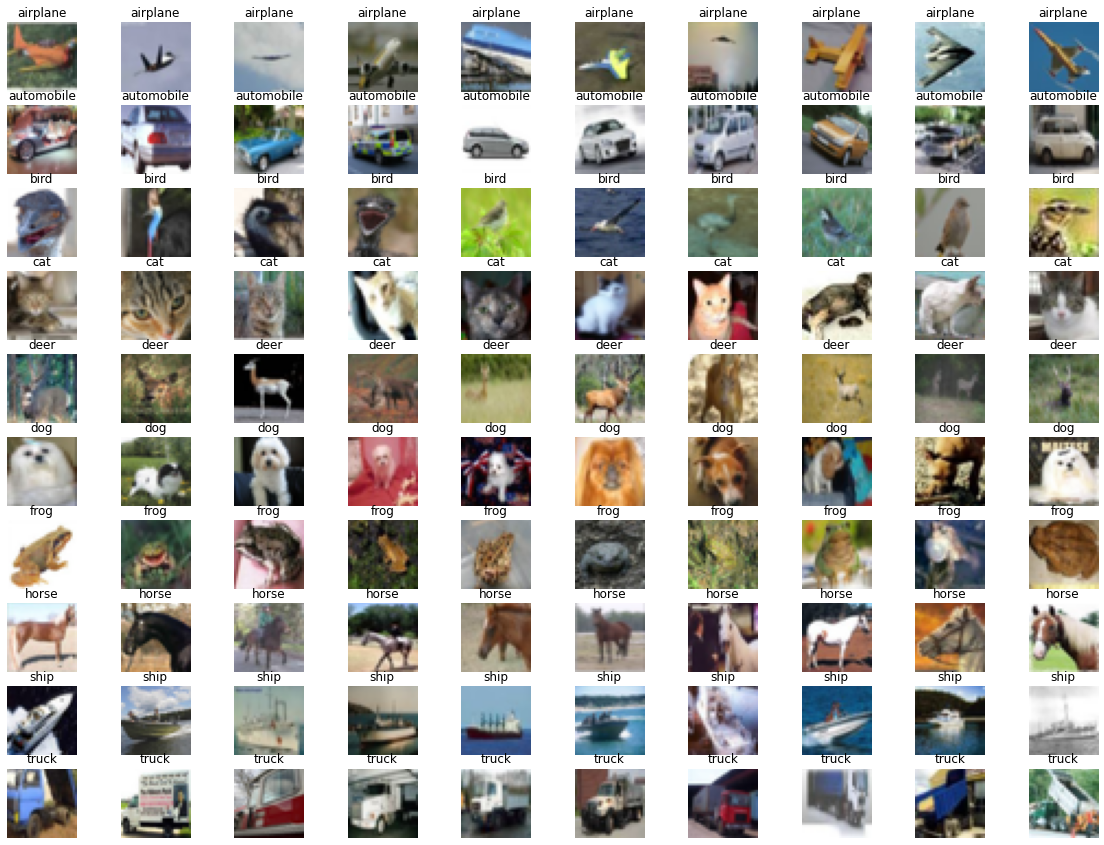

In [47]:
fig = plt.figure(figsize=(20, 15))
plt_id = 1
# Plotting the images by selecting the first 10 images from the 10 classes in the dataset
for label in range(10):
  for idx, image_id in enumerate(np.where(Y==label)[0][:10], start=1):
    plt.subplot(10, 10, plt_id)
    # Reshape the images with height x width x channels
    img = X[image_id].reshape(3, 32, 32).transpose([1, 2, 0])
    plt.title(classes[Y[image_id]])
    plt.imshow(img)
    plt.axis("off")
    plt_id += 1
plt.show()

### Support Vector Machine - Classification (SVC)

#### What is SVM?

Support vector machines are supervised learning models used for classification and regression analysis. A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**Hyperplanes** are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
 * The hyperplane with maximum margin is called the optimal hyperplane.

#### What are support vectors?

* Linear SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. 

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Then compute the distance between the line and the support vectors which is called the margin.

**Margin** is the width that the boundary could be increased by before hitting a data point.



![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)


### Let us define a function for training the Linear Support Vector Classifier

For more details on SVM refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [58]:
def train(train_features, train_labels):
    
    # Create an instance for the LinearSVC classifier
    clf = SVC(kernel='linear', random_state=0, max_iter=1000)

    # Fitting the data into the model
    clf.fit(train_features, train_labels)

    return clf

### Let us define a function to get the prediction on the test set

In [59]:
def predict(clf, test_features):
    
    # Get the prediction on the test data
    predictions = clf.predict(test_features)

    return predictions

### Let us define a function to calculate accuracy score

In [60]:
def eval(predictions, test_labels):   
    return accuracy_score(predictions, test_labels)

###  Let us unpickle the data and labels from CIFAR-10

Now let us unpickle the data and labels from CIFAR-10 dataset and divide them into training and testing sets..

In [61]:
train_features = []
train_labels = []

# Read all training features and labels from all the data_batch files
for j in "12345": 
    batch_file = 'DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    train_features.extend(x_train)
    train_labels.extend(y_train)

# Converting the train features and labels in to an array
train_features = np.asarray(train_features)
train_labels = np.asarray(train_labels)

# Read all test features and labels
test_features, test_labels, names_test, classes_test = get_data("DS_CIFAR-10_STD/test_batch")

# Converting the test features and labels in to an array
test_features = np.asarray(test_features)
test_labels = np.asarray(test_labels)

In [62]:
test_labels.shape, train_labels.shape, test_features.shape, train_features.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

### Let us define a function to extract two classes to perform binary classification


In [63]:
# Function to extract 2 classes to perfrom SVM Linear classification 
def pick_2classes(class0, class1, X, Y):

    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]

    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]

    # Join the two classes (vertically row wise) to make the set
    X_classes = np.vstack((X_0, X_1))
    Y_classes = np.append(Y_0, Y_1)

    return X_classes, Y_classes

In [64]:
# Select the classes #7 and #8 for training and testing the data to get the features
# The class 7 belongs to 'horse' and class 8 belongs to 'ship'
X_train_data, Y_train_data = pick_2classes(7, 8, train_features, train_labels)
X_test_data, Y_test_data = pick_2classes(7, 8, test_features, test_labels)

In [65]:
# Check the shape of train and test data sets
X_train_data.shape, Y_train_data.shape, X_test_data.shape, Y_test_data.shape

((10000, 3072), (10000,), (2000, 3072), (2000,))

In [66]:
# Call the 'train' function with the train data
trained_clf = train(X_train_data, Y_train_data)

# Call the 'predict' function by paasing the trained classifier and the test data
predictions = predict(trained_clf, X_test_data)

# Calculate the accuracy by passing the predictions and the test labels
accuracy = eval(predictions, Y_test_data)

In [67]:
# Print the accuracy score
print('Accuracy score is', accuracy)

Accuracy score is 0.766


**Exercise:** You can also select different class labels 
(0-9) and try passing it to the **pick_2classes** to perform the binary classification using LinearSVM and see the change in accuracy

### Preparing the data to extract the HOG features

In [70]:
# Define a function to reshape the train and test features
def batch_to_rgb(images: np.ndarray) -> np.ndarray:
    """
    Given loaded images from CIFAR-10 dataset (i.e. 32x32 values
    of red, then green and blue), returns same set of images with
    color channel being the last, i.e. batch_to_rgb[n][y][x]
    returns 3-valued array with r, g, b of pixel (x, y) of n-th 
    image. It returns same images with transformed colors to rgb
    
    """
    return images.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)

In [71]:
# Call the function 'batch_to_rgb' on the train and test features
train_features = batch_to_rgb(train_features)
test_features = batch_to_rgb(test_features)

# Check the shape of train features 
print(train_features.shape)

(50000, 32, 32, 3)



### Feature Representation using HOG (Histogram of Oriented Gradients) Method

The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.

Feature extraction is the process by which certain features of interest within an image are detected and represented for further processing. The resulting representation can be subsequently used as an input to the classification techniques, which will then classify, or recognize the semantic contents of the image or its objects. 


To identify the objects using HOG method requires the following steps to be followed :-


**What is Gradient Image?**

<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/Gradient.png" alt="Drawing" height="200" width="460"/>

We start with computing the horizontal and vertical gradients of the image. In the image when we move from left to right pixel by pixel, there might be a change in the pixel value i.e, from a black lower pixel number to a white higher pixel number. Going from left to right gives us the horizontal gradient and going from top to down gives a vertical gradient. This sudden change in the color is called a gradient. 

The gradient image removes a lot of non-essential information (e.g. constant colored background), but highlighted outlines and still we can identify the image. At every pixel, the gradient has a magnitude and a direction. The magnitude of the gradient increases wherever there is a sharp change in intensity. 

**Orientation of Gradients**

HOG works with a block which is similar to a sliding window. A block is considered as a pixel grid in which gradients are constituted from the magnitude and direction of change in the intensities of the pixel within the block.

We first calculate the gradients by taking a block from the images. For the selected block, determine the gradient (or change) in the x-direction and aslo calculate the gradient in the y-direction. Once we get the gradients, we will also calculate the gradient magnitude and gradient angle for each pixel (in the image).

**Histogram of Gradients**
    
The next step is to create a histogram of gradients for the block of pixels from the image. We will take each pixel value, find the angle/orientation of the pixel and update the frequency table. The same process is repeated for all the pixel values and we end up with a frequency table that denotes angles and the occurrence of these angles in the image. This frequency table can be used to generate a histogram with angle values on the x-axis and the frequency on the y-axis.

From the HOG features we will find that the structure of the object is well maintained, ignoring all the insignificant features.

For more details refer to the following [link](https://medium.com/analytics-vidhya/a-gentle-introduction-into-the-histogram-of-oriented-gradients-fdee9ed8f2aa)

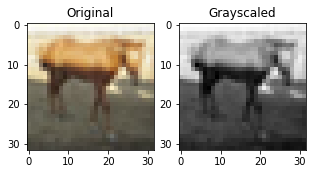

In [72]:
# we will use the methods from scikit-image library, hog() and rgb2gray().
from skimage.color import rgb2gray

# First convert the train and test features to grayscale
# The HOG method works for the gray scale image
hog_train = rgb2gray(train_features)
hog_test  = rgb2gray(test_features)

# Picking up the horse index from train_features
horse = train_features[2000]

# Plotting the original image
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(horse)
ax[0].set_title("Original")

# Plotting the coverted image for the selected index of horse
horse_gray = hog_train[2000]

# Plotting the gray scale image
ax[1].imshow(horse_gray, cmap='gray')
ax[1].set_title("Grayscaled");

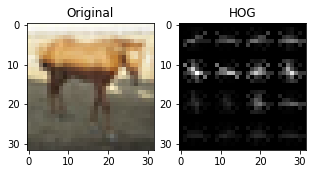

In [73]:
# We use the hog function from skimage.features directly. 
# So we don’t have to calculate the gradients, magnitude (total gradient) and orientation individually. 
# The hog function would internally calculate it and return the feature matrix.
from skimage.feature import hog

# Creating HOG feature Descriptor
# First we pass the the gray scale image of horse
# Set the parameter ‘visualize = True’, which return an image of the HOG
fd, hog_horse = hog(horse_gray, visualize=True)

# Plotting the original image
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(horse)
ax[0].set_title("Original")

# Plotting the HOG image
ax[1].imshow(hog_horse, cmap='gray')
ax[1].set_title("HOG");

From the above we can see the edges of the horse. Even it might be harder to identify a horse on the HOG image, compared to the original image, we can see that only the most important parts are preserved. 

In [74]:
# Joblib is an pacakge that can simply turn our Python code into parallel 
# computing mode and increases the computing speed
# with the Parallel and delayed functions from Joblib, we can simply configure a parallel run of the below function

from joblib import Parallel, delayed

# Function which converts the train and test images to hog images
def to_hog(images):
    return hog(images)

# Get to hog features from the train and test sets
# n_jobs is the number of parallel jobs.
# 'delayed(to_hog)(x) for x in hog_train' creates tuple of the function, x, and the parameters, one for each iteration. 
# Delayed creates these tuples, then Parallel will pass these to the interpreter.
# Parallel(n_jobs=num_cores) does the heavy lifting of multiprocessing. 
# Parallel forks the Python interpreter into a number of processes equal to the number of jobs. 
# Each process will run one iteration, and return the result.

hog_train = np.asarray(Parallel(n_jobs=-1)(delayed(to_hog)(x) for x in hog_train))
hog_test = np.asarray(Parallel(n_jobs=-1)(delayed(to_hog)(x) for x in hog_test))

In [75]:
# Check for the shape of hog train and test features
hog_train.shape, hog_test.shape, train_labels.shape, test_labels.shape

((50000, 324), (10000, 324), (50000,), (10000,))

In [76]:
# Select classes #7 and #8 to extract the HOG features
# Performing binary classification by selecting 2 classes from the data
# The class 7 belongs to 'horse' and class 8 belongs to 'ship'
X_train_hog, Y_train_hog = pick_2classes(7, 8, hog_train, train_labels)
X_test_hog, Y_test_hog = pick_2classes(7, 8, hog_test, test_labels)

In [77]:
# Check for the shape of HOG train and test features
X_train_hog.shape, X_test_hog.shape, Y_train_hog.shape, Y_test_hog.shape

((10000, 324), (2000, 324), (10000,), (2000,))

### Train the classifier and get the predictions

In [78]:
# Call the functions to train the classifier and get the predictions
trained_clf_hog = train(X_train_hog, Y_train_hog)
predictions_hog = predict(trained_clf_hog, X_test_hog)

# Calculate the accuracy
result = eval(predictions_hog, Y_test_hog)

In [79]:
# Print the accuracy on HOG features
print('Accuracy score of HOG features is:', result)

Accuracy score of HOG features is: 0.926


**observation:** From the above experiment, we observe that by using the HOG method we get a better representation of the features considering the important parts of the images. The accuracy for the HOG features is 92.6% using Linear Support Vector Classifier when compared to the original features directly passing to the classifier.

### Model Evaluation on HOG features


#### Classification Report : 

A Classification report is used to measure the quality of predictions from a classification algorithm. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

 * **true positive** The correct label of the given instance is positive, and the classifier also predicts it as a positive
 * **false positive** The correct label is negative, but the classifier incorrectly predicts it as positive
 * **true negative** The correct label is negative, and the classifier also predicts a negative
 * **false negative** The correct label is positive, but the classifier incorrectly predicts it as negative



* **Precision:** The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

    Precision = $\mathbf{\frac{True \ Positive}{True \ Positive + False \ Positive}}$

* **Recall:** Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

   Recall = $\mathbf{\frac{True \ Positive}{True \ Positive + False \ Negative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $ 2* \mathbf{\frac{Precision * Recall}{Precision + Recall}}$

* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.

<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/precision_and_recall.jpg" alt="Drawing" height="400" width="360"/>








For more details on precision and Recall refer to the following [link](https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9)

For example of precision and Recall refer to the following [link](https://towardsdatascience.com/confusion-matrix-clearly-explained-fee63614dc7)

#### Classification Report

In [80]:
# Print the classification report
print(classification_report(Y_test_hog, predictions_hog))

              precision    recall  f1-score   support

           7       0.93      0.92      0.93      1000
           8       0.92      0.94      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



#### Confusion Matrix:


* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 




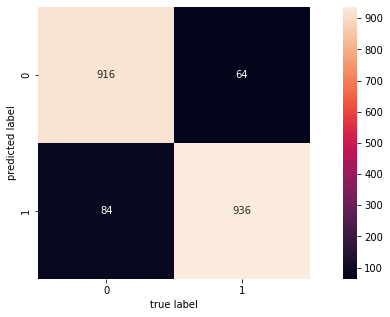

In [81]:
mat = confusion_matrix(Y_test_hog, predictions_hog)

plt.figure(figsize = (12,5))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Please answer the questions below to complete the experiment:




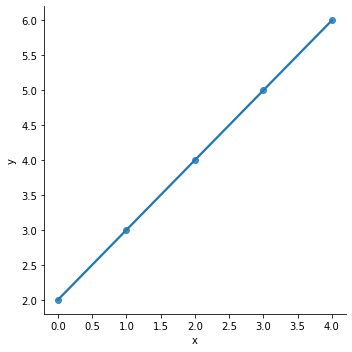

In [89]:
test_1 = ((0, 2), (1, 3), (2, 4), (3, 5), (4, 6))
test_x = []
test_y = []


for i in test_1:
  test_x.append(i[0])
  test_y.append(i[1])

test_df = pd.DataFrame(zip(test_x,test_y))
test_df.columns = ['x','y']

sns.lmplot(data=test_df,x='x',y='y')


In [96]:
np.array(test_df['x']).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [99]:
lin_reg = LinearRegression()
lin_reg.fit(np.array(test_df['x']).reshape(-1,1), np.array(test_df['y']).reshape(-1,1))
y_pred_sk = lin_reg.predict([[12]])
y_pred_sk

array([[14.]])

In [101]:
#@title Q.1. The values of x and their corresponding values of y, (x, y) are as follows: (0, 2), (1, 3), (2, 4), (3, 5), (4, 6). Find the least square regression line y = a x + b for the given values and estimate the value of y when x = 12. { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "14.0" #@param ["","11.0", "13.0","15.2","14.0"]



#### Consider the following statement about SVM and answer Q2.

A. SVM is a supervised machine learning algorithm, which cannot be used for classification but can be used for regression.

B. SVM is an unsupervised machine learning algorithm, which can be used for classification but not for regression.

C. SVM is a supervised machine learning algorithm, which can be used for classification as well as for regression.

D. SVM is an unsupervised machine learning algorithm, which can be used for classification as well as for regression.

In [102]:
#@title Q.2. Which of the following is true for a Support Vector Machine (SVM)?

Answer2 = "Only C" #@param ["","Only A","Only C","Both A and C","Both B and D","All of the above"]


In [103]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [104]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [105]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [106]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [107]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [108]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 858
Date of submission:  18 Mar 2023
Time of submission:  18:49:20
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
